In [30]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggpubr)
require(pbapply)
pboptions(type="timer")
require(viridis)

In [11]:
root = "../data/strip_of_tissue"
nthreads=10

In [5]:
list.files(file.path(root, "raw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_non_DW.csv.gz"

In [6]:
list.files(file.path(root, "dw"))

[1] "MP_snRNAseq_filt_subclass.csv" "spots_DW.fov_028.csv.gz"      
[3] "spots_DW.fov_029.csv.gz"       "spots_DW.fov_030.csv.gz"      
[5] "spots_DW.fov_031.csv.gz"       "spots_DW.fov_032.csv.gz"      
[7] "spots_DW.fov_033.csv.gz"       "spots_DW.fov_034.csv.gz"

In [8]:
head(fread(file.path(root, "raw", "MP_snRNAseq_filt_subclass.csv")))

V1,Cell_Num,X,Y,ClassName,Prob
<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
614,615,5110.179,24576.70,Astrocyte,0.9999966
1825,1826,28618.661,25648.23,Astrocyte,0.9932002
699,700,19541.449,24664.62,Astrocyte,0.9999728
1335,1336,6673.996,25203.05,Astrocyte,0.9875642
1336,1337,9696.166,25193.09,Astrocyte,0.8060619
1842,1843,27489.178,25661.46,Astrocyte,0.9942978


In [69]:
head(fread(file.path(root, "raw", "spots_non_DW.csv.gz")))
fread(file.path(root, "raw", "spots_non_DW.csv.gz"))[, .N, by=fov]

z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds,fov
<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<int>
0,2124,3798,2,0,0,1,2123,2126,3797,3800,0,617.2779,4245.208,0,,0.2631469,FALSE,28
0,2124,3650,2,1,0,1,2123,2126,3649,3652,1,593.2239,4245.208,0,,0.4419946,FALSE,28
0,2124,2669,2,2,0,1,2123,2126,2668,2671,2,433.7848,4245.208,0,,0.4298917,FALSE,28
0,2124,1695,2,3,0,1,2123,2126,1694,1697,3,275.4834,4245.208,0,,0.1805702,FALSE,28
0,2124,1582,3,4,0,1,2122,2127,1580,1585,4,257.1179,4245.208,0,,0.4863661,FALSE,28
0,2124,1577,2,5,0,1,2123,2126,1576,1579,5,256.3052,4245.208,0,,0.5192081,FALSE,28


fov,N
<int>,<int>
28,22840
29,32631
30,29490
31,21278
32,15215
33,10357
34,1903


In [12]:
cell_data = rbindlist(pblapply(c("dw", "raw"), function(image_type) {
    d = fread(file.path(root, image_type, "MP_snRNAseq_filt_subclass.csv"))
    d$image_type = image_type
    return(d)
}, cl=nthreads))

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


In [14]:
cell_data[, V1 := NULL]

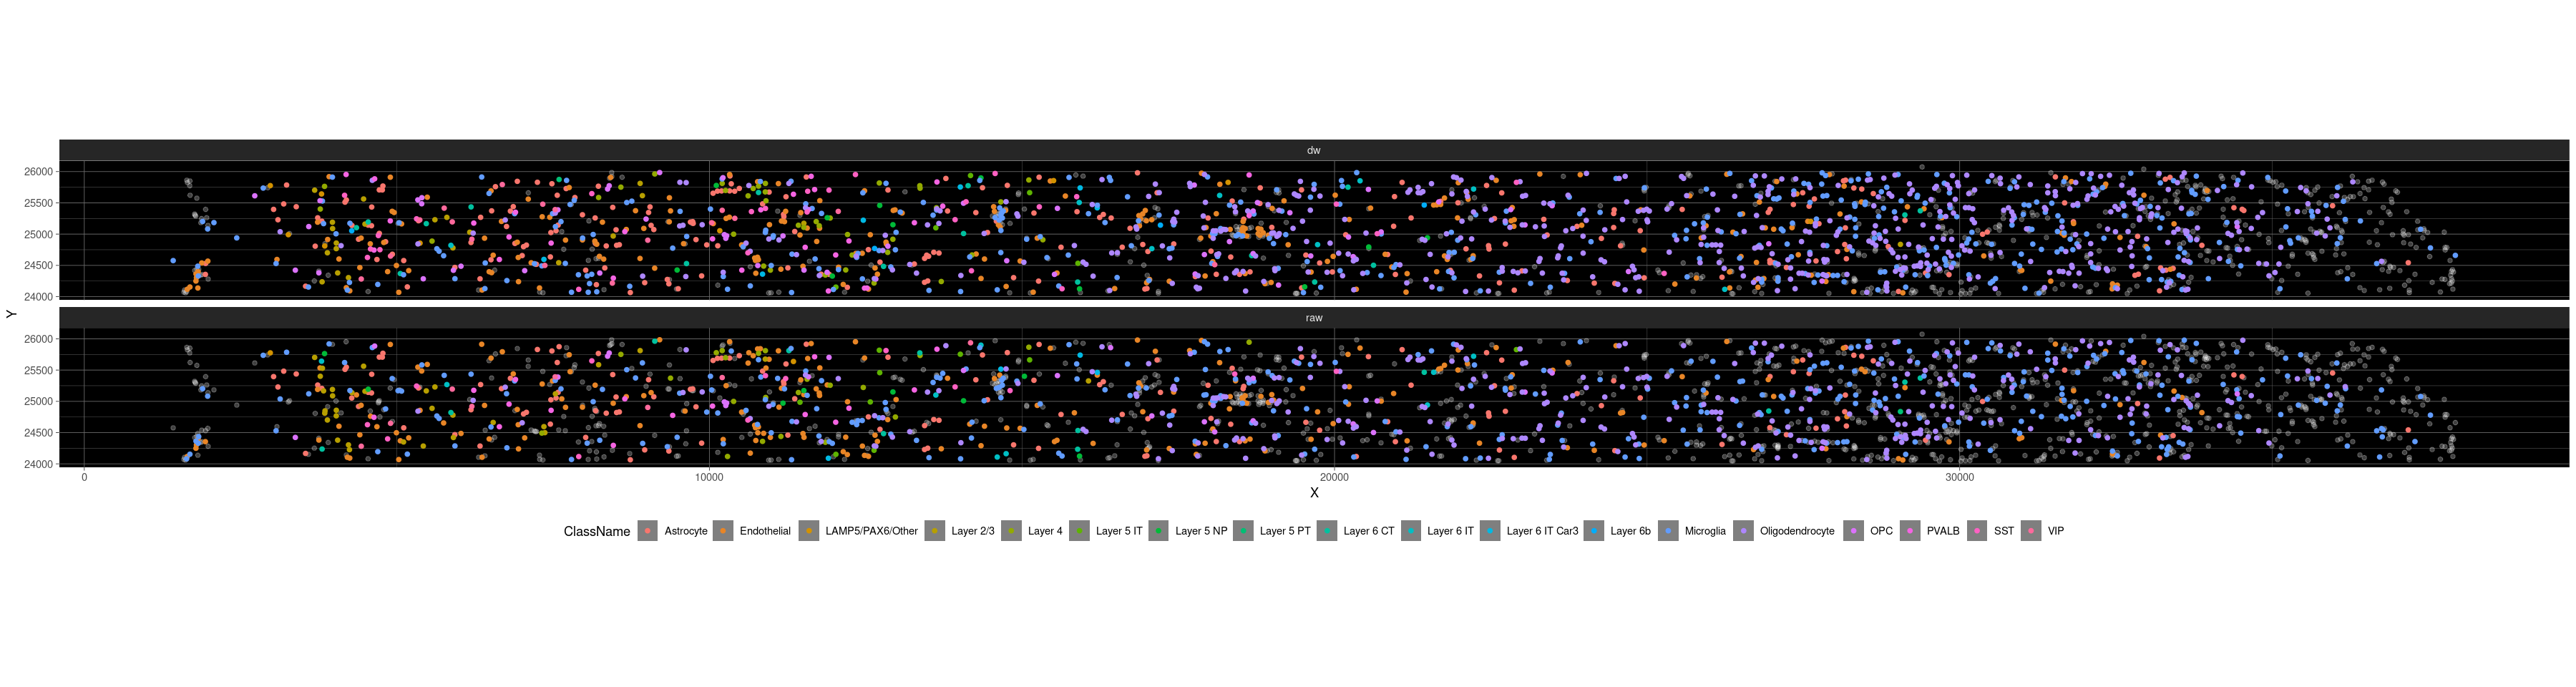

In [51]:
options(repr.plot.width=30, repr.plot.height=8)
ggplot(cell_data[ClassName != "Zero"], aes(X, Y, color=ClassName)) +
    geom_point(data=cell_data[ClassName == "Zero"], color="white", alpha=.25) +
    geom_point() + theme_dark() +
    theme(legend.position="bottom") + coord_fixed() + guides(color=guide_legend(nrow=1)) +
    theme(panel.background=element_rect(fill="black")) +
    facet_wrap(~image_type, nrow=2)

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


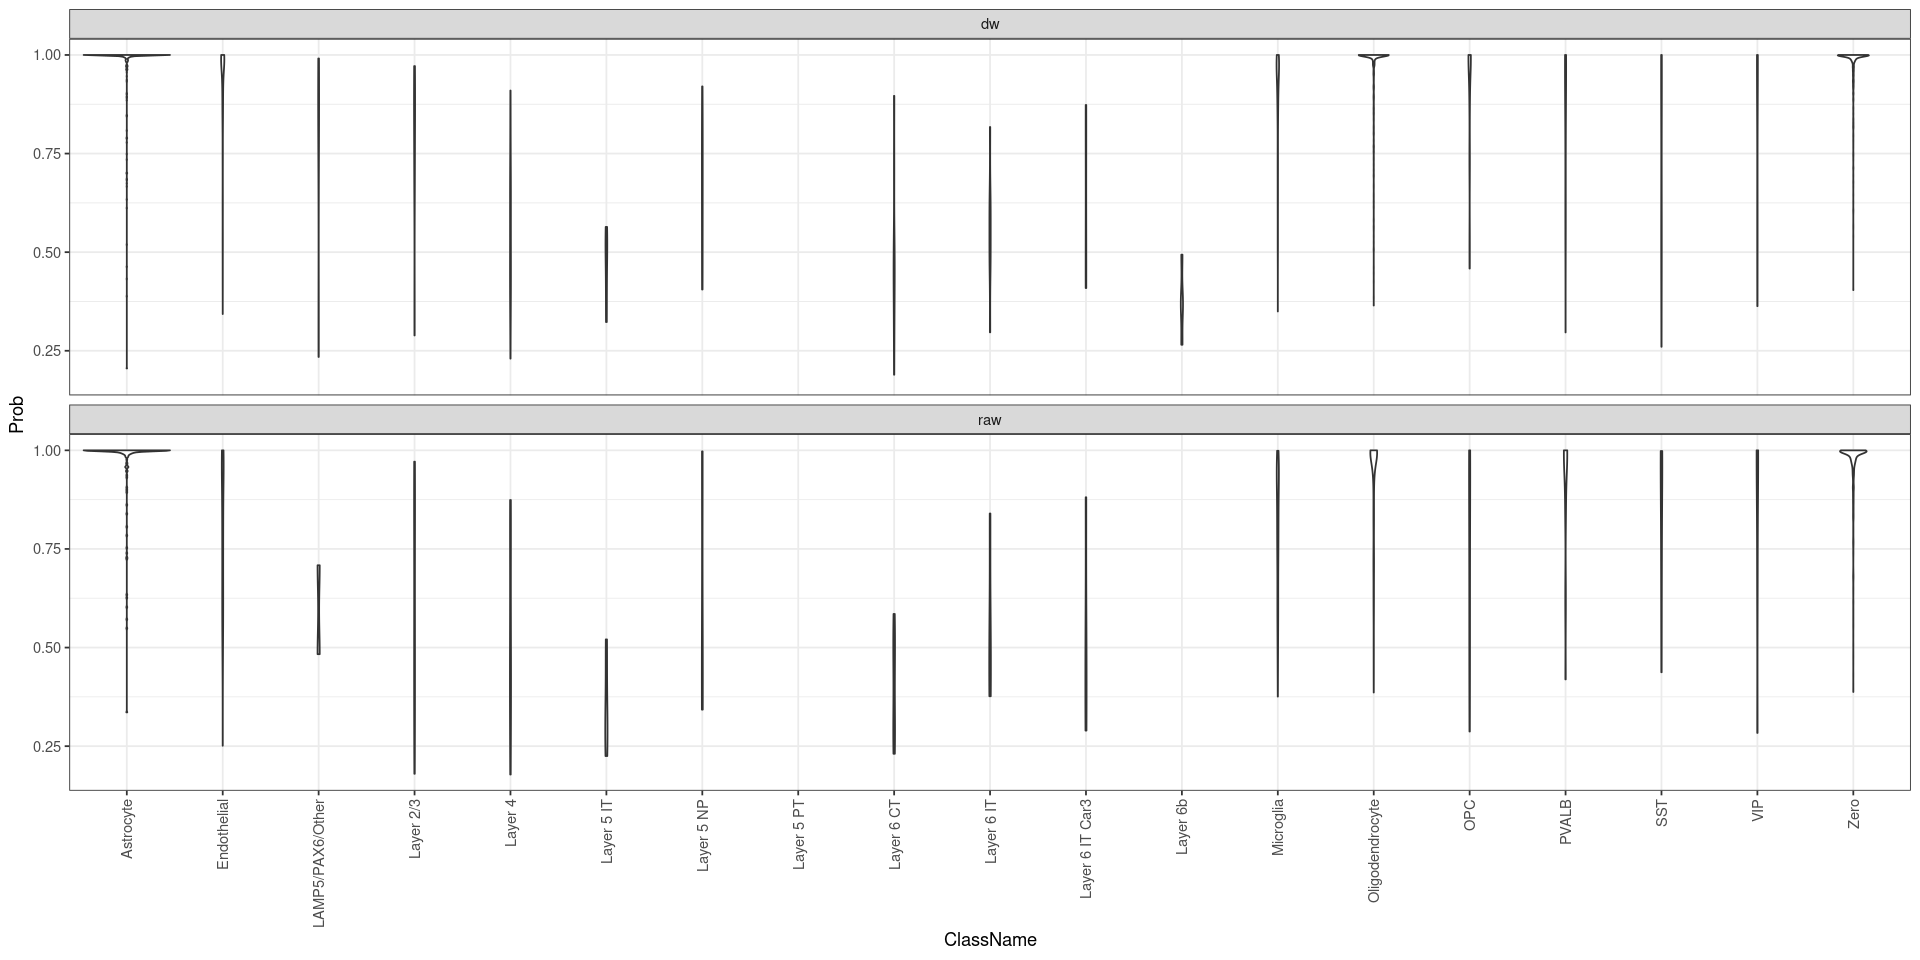

In [57]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_violin(trim=T) +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

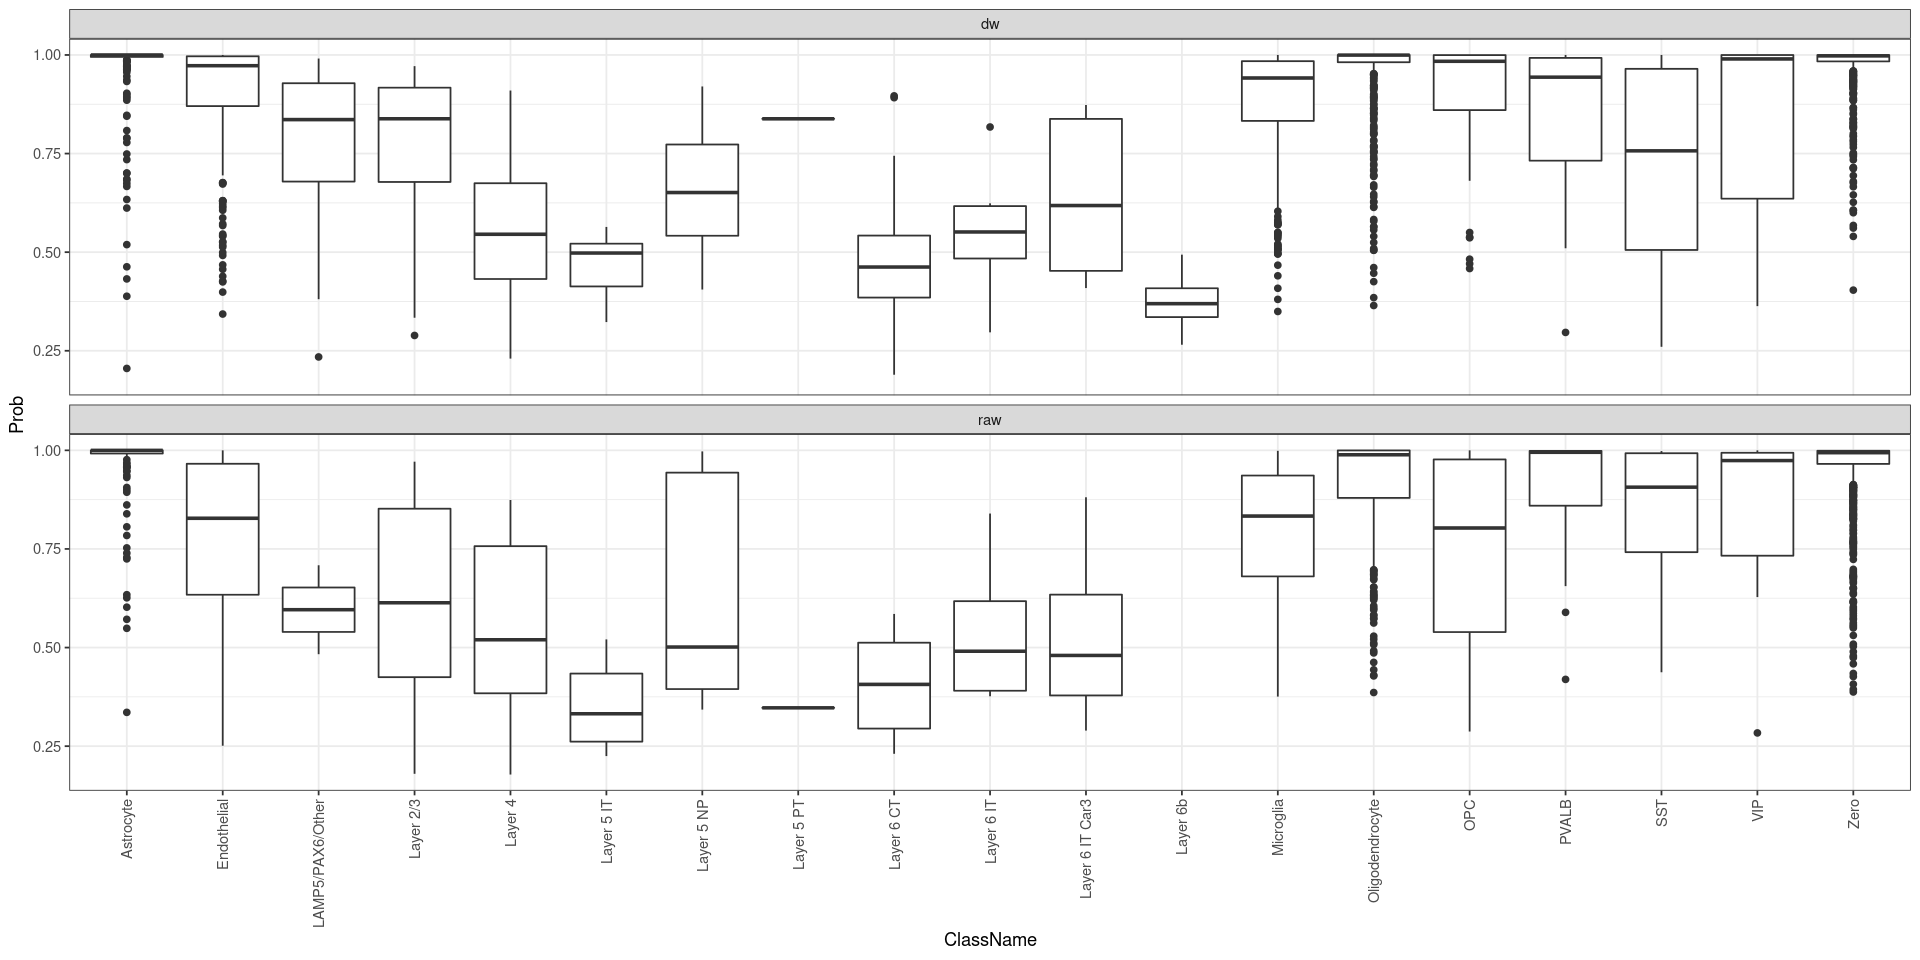

In [58]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cell_data, aes(x=ClassName, y=Prob)) + geom_boxplot() +
    facet_wrap(~image_type, nrow=2) + theme_bw() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))

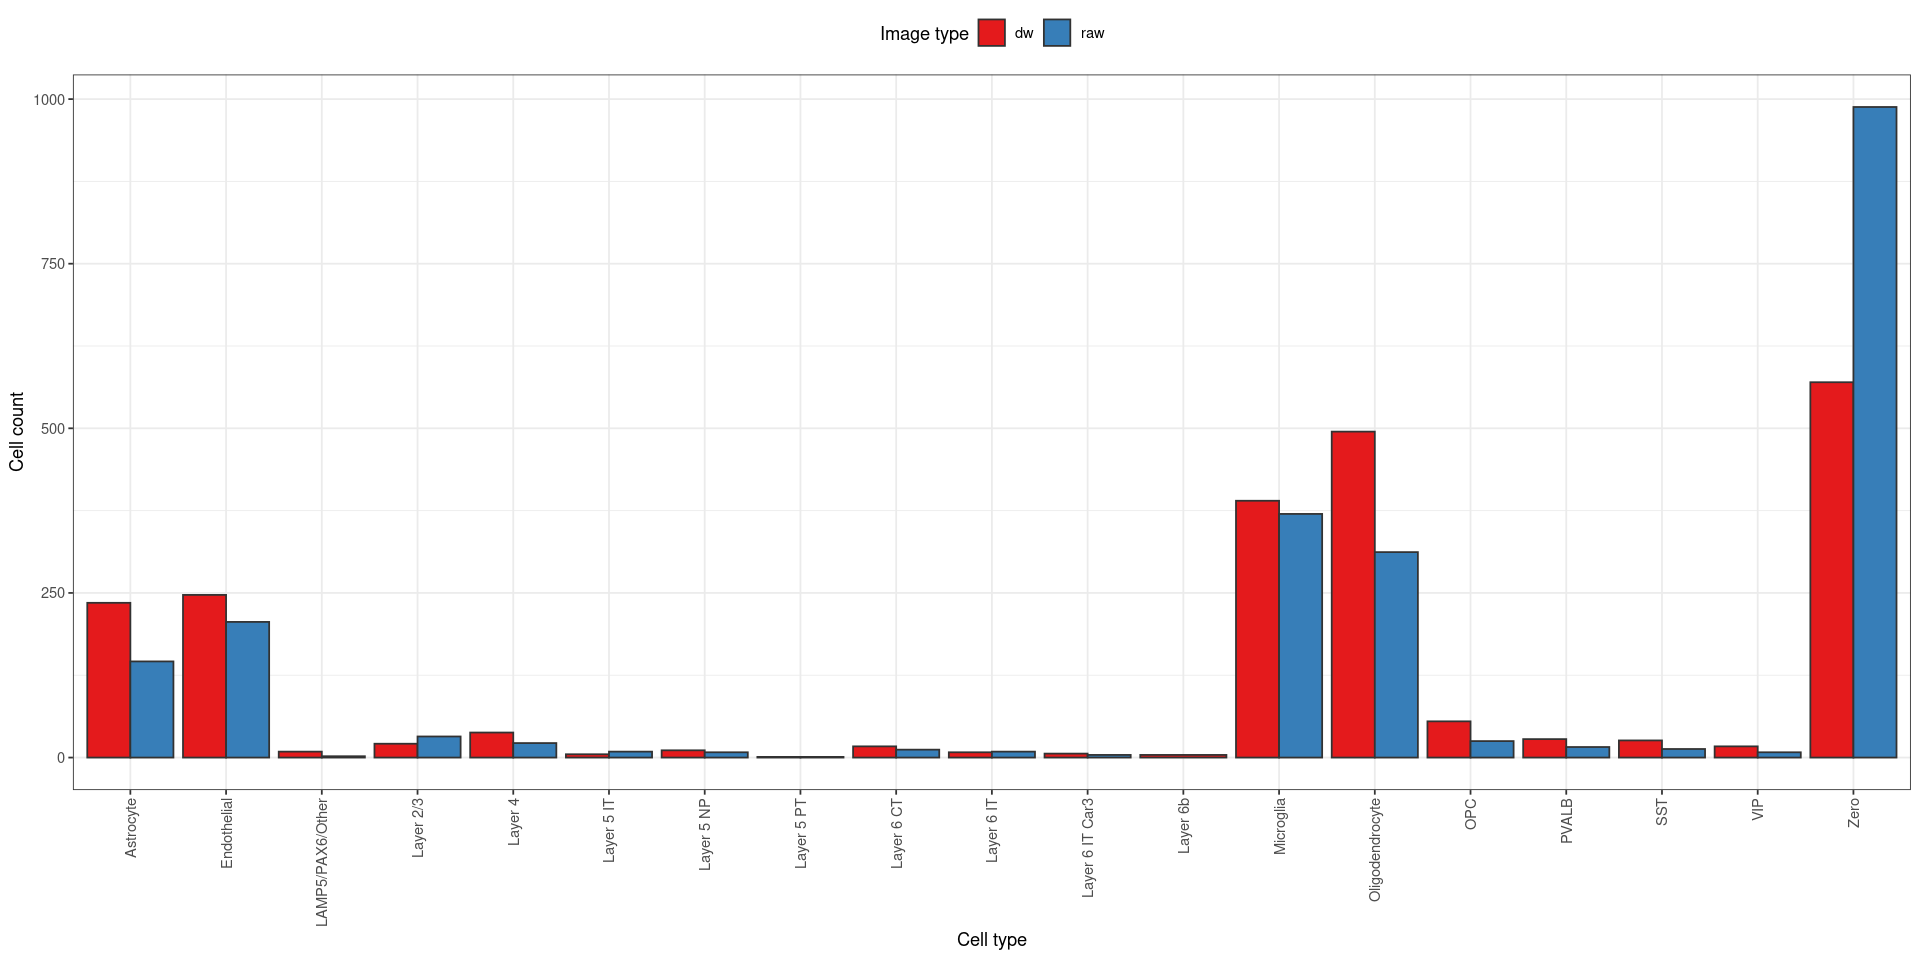

In [68]:
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")

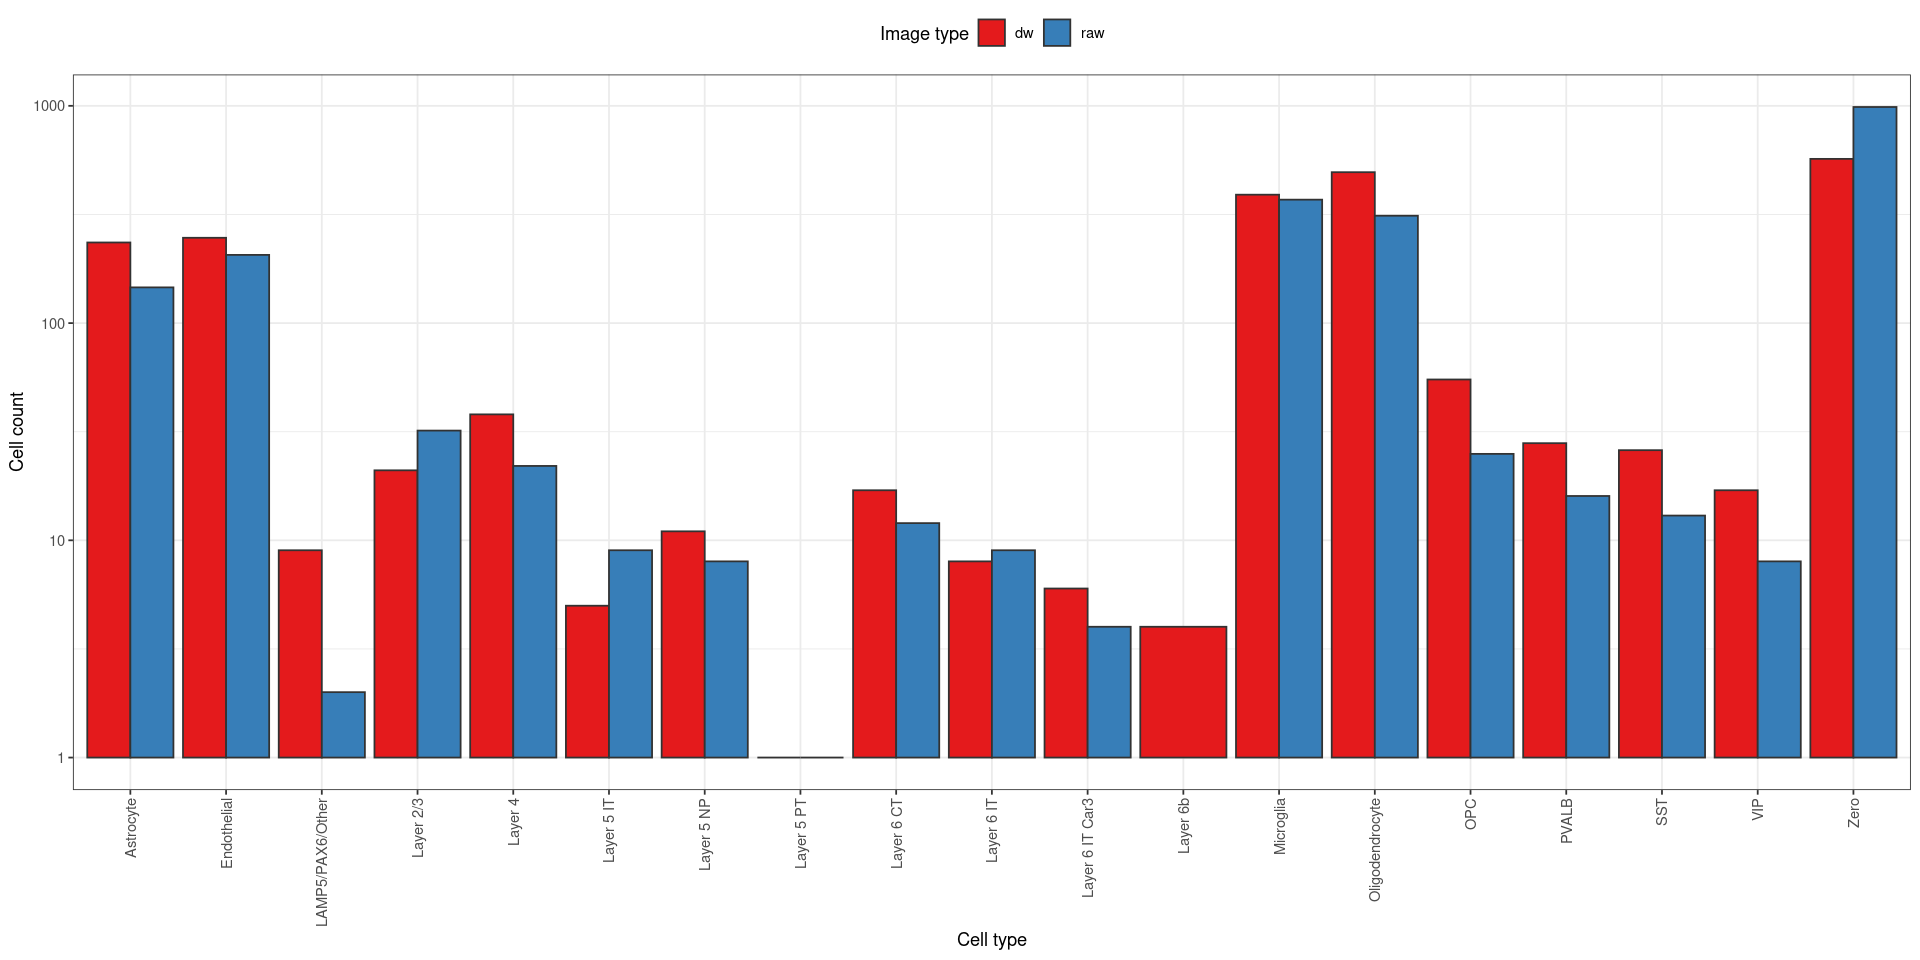

In [67]:
ggplot(cell_data[, .N, by=c("ClassName", "image_type")], aes(x=ClassName, y=N, fill=image_type)) +
    geom_col(position="dodge", color="#323232") +
    scale_y_log10() + theme_bw() + theme(legend.position="top", axis.text.x=element_text(angle=90, hjust=1, vjust=.5)) +
    scale_fill_brewer("Image type", palette="Set1") + labs(x="Cell type", y="Cell count")